In [3]:
from IPython.lib.display import YouTubeVideo
from sklearn.linear_model import RidgeCV, Ridge, LassoCV, LinearRegression,Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn

In [6]:
df = pd.read_excel('Combine01.xlsx')

#Delete blank
df = df.dropna(subset=['C2401.pH'], axis=0)
df = df.dropna(subset=['C2401.Cl'], axis=0)
df = df.dropna(subset=['C2401.NH3'], axis=0)
df = df.dropna(subset=['C2401.H2S'], axis=0)

#resetindex
df.reset_index(drop=True, inplace=True)
df

,Posting Date,V1051.pH,V1051.Cl,V1051.Fe,V1051.NH3,V1051.H2S,C2401.IOW(in/Out),C2401.pH,C2401.SWS Feed,C2401.Fe,...,SMB,SOK,SUT,SVD,TGT,UJU,UML,UPZ,VGG,WTM
0,2019-11-14,NaN,NaN,NaN,NaN,NaN,0.0,4.01,1681.769531,5.920,...,0.0,0.0,0.000000,0.0,0,0.000000,0.0,0,0,3.486378
1,2019-11-15,2.90,3.7800,127.500,40.0,8.43,0.0,5.14,2029.909302,5.190,...,0.0,0.0,0.000000,0.0,0,0.000000,0.0,0,0,3.854966
2,2019-11-16,7.99,73.0000,16.750,140.5,20.94,0.0,6.15,1120.387573,8.750,...,0.0,0.0,7.499825,0.0,0,0.000000,0.0,0,0,2.137537
3,2019-11-17,NaN,NaN,NaN,NaN,NaN,0.0,6.08,1268.605225,1.600,...,0.0,0.0,8.565211,0.0,0,0.000000,0.0,0,0,2.151467
4,2019-11-18,NaN,NaN,NaN,NaN,NaN,0.0,7.08,897.216248,1.600,...,0.0,0.0,8.562859,0.0,0,0.000000,0.0,0,0,2.126031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-07-21,8.06,2.3040,0.293,420.0,220,1.0,8.62,NaN,0.079,...,0.0,0.0,0.000000,0.0,0,1.191978,0.0,0,0,4.393206
726,2023-07-24,8.60,4.8602,0.041,277.0,375,1.0,8.04,NaN,0.087,...,0.0,0.0,0.591550,0.0,0,0.000000,0.0,0,0,26.511044
727,2023-07-26,8.54,4.8862,0.058,200.0,205,1.0,8.46,NaN,0.098,...,0.0,0.0,0.352831,0.0,0,1.265783,0.0,0,0,29.186502
728,2023-07-28,7.58,1.9500,0.097,420.0,150,1.0,8.18,NaN,0.085,...,0.0,0.0,0.000000,0.0,0,1.342506,0.0,0,0,38.858001


In [7]:
df.iloc[:, 10:13].head()

,C2401.Cl,C2401.NH3,C2401.H2S
0,29.87,14.35,10.34
1,76.53,70.00,43.37
2,9.70,19.50,17.37
3,19.25,14.50,17.17
4,19.25,14.50,17.17


In [8]:
df.iloc[:, 19:99].head()

,AGB,ALB,ALS,AMB,AMN,ARL,ARM,AXL,AZB,BAI,...,SMB,SOK,SUT,SVD,TGT,UJU,UML,UPZ,VGG,WTM
0,0.0,0.0,0.0,0,0,0,0,0.0,0.223211,0,...,0.0,0.0,0.000000,0.0,0,0.0,0.0,0,0,3.486378
1,0.0,0.0,0.0,0,0,0,0,0.0,1.668127,0,...,0.0,0.0,0.000000,0.0,0,0.0,0.0,0,0,3.854966
2,0.0,0.0,0.0,0,0,0,0,0.0,1.565648,0,...,0.0,0.0,7.499825,0.0,0,0.0,0.0,0,0,2.137537
3,0.0,0.0,0.0,0,0,0,0,0.0,1.611664,0,...,0.0,0.0,8.565211,0.0,0,0.0,0.0,0,0,2.151467
4,0.0,0.0,0.0,0,0,0,0,0.0,1.627184,0,...,0.0,0.0,8.562859,0.0,0,0.0,0.0,0,0,2.126031


In [9]:
print(df['C2401.IOW(in/Out)'].value_counts())

C2401.IOW(in/Out)
1.0    660
0.0     70
Name: count, dtype: int64


In [10]:
from sklearn.utils import resample

df_majority = df[df['C2401.IOW(in/Out)'] == 1]
df_minority = df[df['C2401.IOW(in/Out)'] == 0]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,              
                                 n_samples=df_majority.shape[0],  
                                 random_state=123)         


df_upsampled = pd.concat([df_majority, df_minority_upsampled])


print(df_upsampled['C2401.IOW(in/Out)'].value_counts())

C2401.IOW(in/Out)
1.0    660
0.0    660
Name: count, dtype: int64


In [11]:
column_names = list(df_upsampled.columns)
print(column_names)

['Posting Date', 'V1051.pH', 'V1051.Cl', 'V1051.Fe', 'V1051.NH3', 'V1051.H2S', 'C2401.IOW(in/Out)', 'C2401.pH', 'C2401.SWS Feed', 'C2401.Fe', 'C2401.Cl', 'C2401.NH3', 'C2401.H2S', 'V-2002 ADIP#1.pH', 'V-2002 ADIP#1.NH3', 'V-2052 ADIP#2.pH', 'V-2052 ADIP#2.NH3', 'V-2882.pH', 'V-2882.NH3', 'AGB', 'ALB', 'ALS', 'AMB', 'AMN', 'ARL', 'ARM', 'AXL', 'AZB', 'BAI', 'BAK', 'BAU', 'BEN', 'BER', 'BIN', 'BLN', 'BLU', 'BUG', 'BUO', 'CAB', 'CHA', 'CLO', 'Crude Slop', 'DAL', 'DAS', 'DJE', 'DOB', 'DUB', 'DUS', 'Dar', 'EGI', 'ELS', 'ERH', 'ESP', 'GEB', 'GIR', 'ICH', 'IRA', 'JSM', 'JUB', 'KET', 'KIK', 'KIM', 'KIS', 'LAB', 'LSJ', 'LUL', 'LYB', 'MAB', 'MAH', 'MAO', 'MIL', 'MIN', 'MO2', 'MRO', 'MUR', 'NSX', 'NY1', 'OMA', 'PAT', 'PAZ', 'PYR', 'QAL', 'QAM', 'QUI', 'RBL', 'RUB', 'SA1', 'SIB', 'SLE', 'SMB', 'SOK', 'SUT', 'SVD', 'TGT', 'UJU', 'UML', 'UPZ', 'VGG', 'WTM']


In [12]:
X = pd.concat([df_upsampled.iloc[:, 10:13], df.iloc[:, 19:99]], axis=1)
Y = df_upsampled['C2401.IOW(in/Out)']
X.head()

,C2401.Cl,C2401.NH3,C2401.H2S,AGB,ALB,ALS,AMB,AMN,ARL,ARM,...,SMB,SOK,SUT,SVD,TGT,UJU,UML,UPZ,VGG,WTM
5,6.70,197.5,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,8.427565,0.0,0,0.0,0.0,0,0,2.188119
6,5.67,25.5,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,8.397283,0.0,0,0.0,0.0,0,0,2.617437
8,2.80,39.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,1.061338,0.0,0,0.0,0.0,0,0,4.542014
9,7.20,25.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.845005,0.0,0,0.0,0.0,0,0,11.751712
10,5.00,63.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,2.467585,0.0,0,0.0,0.0,0,0,29.814749


In [13]:
print(X)

     C2401.Cl  C2401.NH3  C2401.H2S  AGB  ALB  ALS  AMB  AMN  ARL  ARM  ...   
5        6.70      197.5       0.00  0.0  0.0  0.0    0    0    0    0  ...  \
6        5.67       25.5       0.00  0.0  0.0  0.0    0    0    0    0  ...   
8        2.80       39.0       0.00  0.0  0.0  0.0    0    0    0    0  ...   
9        7.20       25.0       0.00  0.0  0.0  0.0    0    0    0    0  ...   
10       5.00       63.0       0.00  0.0  0.0  0.0    0    0    0    0  ...   
..        ...        ...        ...  ...  ...  ...  ...  ...  ...  ...  ...   
109      3.66       54.0       0.00  0.0  0.0  0.0    0    0    0    0  ...   
96       5.61       50.0       0.00  0.0  0.0  0.0    0    0    0    0  ...   
668      4.60       38.0       6.00  0.0  0.0  0.0    0    0    0    0  ...   
109      3.66       54.0       0.00  0.0  0.0  0.0    0    0    0    0  ...   
129      6.52       44.0       3.74  0.0  0.0  0.0    0    0    0    0  ...   

     SMB  SOK       SUT       SVD  TGT       UJU  U

In [95]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True)

In [15]:
# excel_file = "export01.xlsx"
# X.to_excel(excel_file, index=False)

**Decision Tree**

In [16]:
clf = DecisionTreeClassifier()

# Step 5: Train the Decision Tree classifier on the training data
clf.fit(X_train, Y_train)

# Step 6: Make predictions on the testing data
Y_pred = clf.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.55%


RANDOM FOREST

Accuracy: 97.58%
[[169   0]
 [  8 153]]


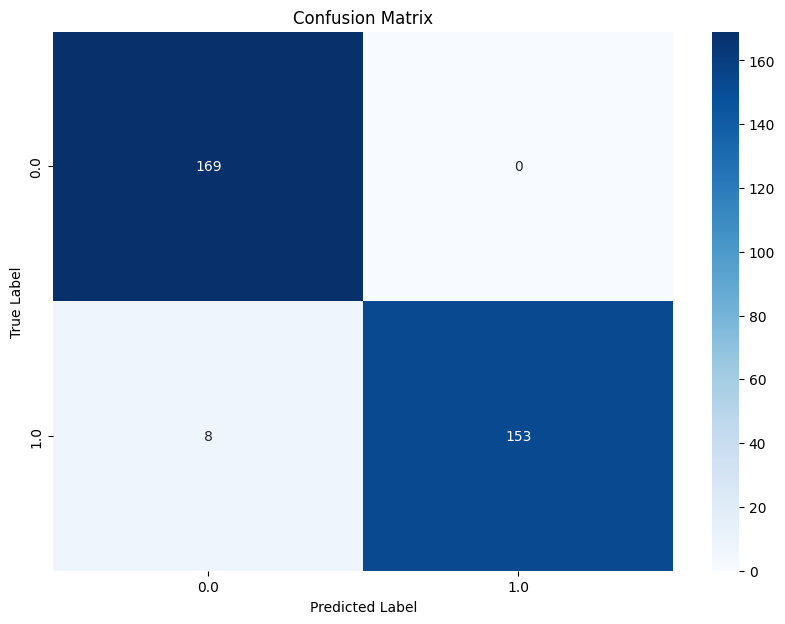

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(Y_test, Y_pred)

print(cm)

classes = list(set(Y_test))  # This gets the unique class names for labeling

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

LOGISTIC REGRESSION

In [103]:
# Training the Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, Y_train)

# Predictions
Y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 80.91%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       168
         1.0       0.84      0.75      0.79       162

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330


Confusion Matrix:
 [[145  23]
 [ 40 122]]


SUPPORT VECTOR MACHINE (SVM)

In [100]:
clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)

# Predictions
Y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("SVM Classification Report:\n", classification_report(Y_test, Y_pred))
print("\nSVM Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 79.09%
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.90      0.81       168
         1.0       0.87      0.68      0.76       162

    accuracy                           0.79       330
   macro avg       0.80      0.79      0.79       330
weighted avg       0.80      0.79      0.79       330


SVM Confusion Matrix:
 [[151  17]
 [ 52 110]]


GRADIENT BOOSTING

Accuracy: 97.88%
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       168
         1.0       1.00      0.96      0.98       162

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

[[168   0]
 [  7 155]]


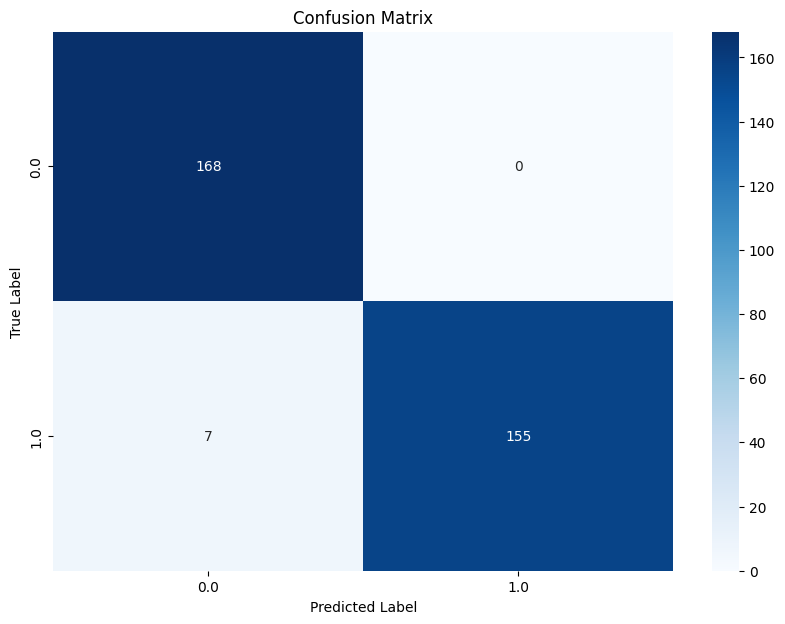

In [101]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=3, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1, max_depth=4, max_features = "log2", random_state=42)
gb_clf.fit(X_train, Y_train)

# Predictions
Y_pred_gb = gb_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(Y_test, Y_pred_gb)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Gradient Boosting Classification Report:\n", classification_report(Y_test, Y_pred_gb))
#print("\nGradient Boosting Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_gb))

cm = confusion_matrix(Y_test, Y_pred_gb)

print(cm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

TUNING HYPERPARAMETERS

In [21]:
# Example parameters grid. Adjust based on your knowledge and dataset characteristics.
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.8, 1],
    'max_features': ['auto', 'sqrt', 'log2']
}

gb_clf = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 1}
Best Score: 0.9696969696969697


**TEST**


In [63]:
data_test = pd.read_excel('test data/test_demo.xlsx')
data_test

,Posting Date,C2401.pH,C2401.Cl,C2401.NH3,C2401.H2S,AGB,ALB,ALS,AMB,AMN,...,SMB,SOK,SUT,SVD,TGT,UJU,UML,UPZ,VGG,WTM
0,2019-11-14,4.01,29.87,14.35,10.34,0,0,0,0,0,...,0,0,0.000000,0,0,0,0,0,0,3.486378
1,2019-11-15,5.14,76.53,70.00,43.37,0,0,0,0,0,...,0,0,0.000000,0,0,0,0,0,0,3.854966
2,2019-11-16,6.15,9.70,19.50,17.37,0,0,0,0,0,...,0,0,7.499825,0,0,0,0,0,0,2.137537
3,2019-11-17,6.08,19.25,14.50,17.17,0,0,0,0,0,...,0,0,8.565211,0,0,0,0,0,0,2.151467
4,2019-11-18,7.08,19.25,14.50,17.17,0,0,0,0,0,...,0,0,8.562859,0,0,0,0,0,0,2.126031
5,2019-11-19,9.74,6.70,197.50,0.00,0,0,0,0,0,...,0,0,8.427565,0,0,0,0,0,0,2.188119
6,2019-11-20,9.17,5.67,25.50,0.00,0,0,0,0,0,...,0,0,8.397283,0,0,0,0,0,0,2.617437
7,2019-11-21,10.38,3.68,215.00,7.71,0,0,0,0,0,...,0,0,8.387604,0,0,0,0,0,0,2.620504
8,2019-11-22,9.55,2.80,39.00,0.00,0,0,0,0,0,...,0,0,1.061338,0,0,0,0,0,0,4.542014


In [67]:
data_test_final = data_test.iloc[:, 2:]
data_test_final

,C2401.Cl,C2401.NH3,C2401.H2S,AGB,ALB,ALS,AMB,AMN,ARL,ARM,...,SMB,SOK,SUT,SVD,TGT,UJU,UML,UPZ,VGG,WTM
0,29.87,14.35,10.34,0,0,0,0,0,0,0,...,0,0,0.000000,0,0,0,0,0,0,3.486378
1,76.53,70.00,43.37,0,0,0,0,0,0,0,...,0,0,0.000000,0,0,0,0,0,0,3.854966
2,9.70,19.50,17.37,0,0,0,0,0,0,0,...,0,0,7.499825,0,0,0,0,0,0,2.137537
3,19.25,14.50,17.17,0,0,0,0,0,0,0,...,0,0,8.565211,0,0,0,0,0,0,2.151467
4,19.25,14.50,17.17,0,0,0,0,0,0,0,...,0,0,8.562859,0,0,0,0,0,0,2.126031
5,6.70,197.50,0.00,0,0,0,0,0,0,0,...,0,0,8.427565,0,0,0,0,0,0,2.188119
6,5.67,25.50,0.00,0,0,0,0,0,0,0,...,0,0,8.397283,0,0,0,0,0,0,2.617437
7,3.68,215.00,7.71,0,0,0,0,0,0,0,...,0,0,8.387604,0,0,0,0,0,0,2.620504
8,2.80,39.00,0.00,0,0,0,0,0,0,0,...,0,0,1.061338,0,0,0,0,0,0,4.542014


In [73]:
#Gradient Boosting Classifier

#gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1, max_depth=4, max_features = "log2", random_state=42)
#gb_clf.fit(X_train, Y_train)

#predicted_ph = gb_clf.predict(data_test_final)

In [88]:
#Decision Tree

#clf = DecisionTreeClassifier()
#clf.fit(X_train, Y_train)

#predicted_ph = clf.predict(data_test_final)

c:\Users\26005064\Desktop\T-II GPT\.venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [90]:
#Logistic Regression

clf = LogisticRegression()
clf.fit(X_train, Y_train)

predicted_ph = clf.predict(data_test_final)

print(predicted_ph)

[0. 0. 0. 0. 0. 1. 0. 1. 0.]


c:\Users\26005064\Desktop\T-II GPT\.venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [76]:
#Random Forest Classifier

#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, Y_train)

#predicted_ph = clf.predict(data_test_final)

c:\Users\26005064\Desktop\T-II GPT\.venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [78]:
#Support Vector Machine

#clf = SVC(kernel='linear')
#clf.fit(X_train, Y_train)

#predicted_ph = clf.predict(data_test_final)

c:\Users\26005064\Desktop\T-II GPT\.venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [92]:
data1 = data_test.iloc[:, :2]
data_concat = pd.concat([data1, pd.DataFrame(predicted_ph)], axis=1)
data_concat.rename(columns={data_concat.columns[-1]: 'IOW (In=1/Out=0)'}, inplace=True)


data_concat


,Posting Date,C2401.pH,IOW (In=1/Out=0)
0,2019-11-14,4.01,0.0
1,2019-11-15,5.14,0.0
2,2019-11-16,6.15,0.0
3,2019-11-17,6.08,0.0
4,2019-11-18,7.08,0.0
5,2019-11-19,9.74,1.0
6,2019-11-20,9.17,0.0
7,2019-11-21,10.38,1.0
8,2019-11-22,9.55,0.0


In [94]:
data_concat.to_csv('result.csv', index=False)

***Streamlit App***

In [87]:
pip install streamlit pandas scikit-learn openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
import streamlit as st
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Load your trained model (for the sake of this example, we're initializing a dummy model)
# Make sure to replace this with loading your actual trained model
model = LogisticRegression()
# model.load("path_to_your_trained_model.pkl")

st.title("pH Prediction App")

uploaded_file = st.file_uploader("Choose an Excel file", type=["xlsx", "xls"])

if uploaded_file:
    data = pd.read_excel(uploaded_file, engine="openpyxl")
    st.write("Uploaded Data:")
    st.write(data)

    # Predict pH values
    # For the sake of this example, we'll assume 'data' can be directly fed to the model.
    # Adjust preprocessing if necessary.
    predictions = model.predict(data)
    
    st.write("Predictions:")
    st.write(predictions)


2023-10-20 21:47:14.833 
  command:

    streamlit run c:\Users\26005064\Desktop\T-II GPT\.venv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
